KELOMPOK 6 (DS-45-01)
1. Akmal Muzakki Bakir (1305210087)
2. Namira Salsabilla (1305210091)
3. Muhammad Zaki Rabbani (1305210095)

## **STATEMENT LIBRARY YANG AKAN DIGUNAKAN**

In [ ]:
!pip install yfinance
!pip install pandas_datareader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import yfinance as yf
import pandas as pd
import pandas_datareader.data as pdr
import math
import random

## **PEMBACAAN DATA DAN PENENTUAN PARAMETER**

Kodingan ini digunakan untuk mengambil data historis dan aktual dari saham perusahaan PT. Pertamina Gas (PGAS.JK) dengan data historis dari tanggal 5 Juli 2021 sampai 5 Juli 2022 dan dengan data aktual dari tanggal 5 Juli 2022 sampai 3 Januari 2023. Kemudian data tersebut disimpan dalam file CSV dengan nama "PGASHist.JK.csv" dan "PGASAct.JK.csv" masing-masing. Data yang dihapus dari data historis adalah 'Dividends' dan 'Stock Splits'.

In [ ]:
ypgas = yf.Ticker("PGAS.JK")
start_date = '2021-07-05'
end_date = '2022-07-05'
overall = ypgas.history(start="2021-07-05", end="2023-01-03")
hist = ypgas.history(start=start_date, end=end_date)
act = ypgas.history(start="2022-07-05", end="2023-01-03")
hist.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
hist.to_csv('PGASHist.JK.csv')
act.to_csv('PGASAct.JK.csv')

## **PLOT GRAFIK DATA HISTORIKAL DAN AKTUAL**

Kodingan ini digunakan untuk membuat plot dari data harga saham perusahaan PT. Pertamina Gas (PGAS.JK) yang diambil dari data historis (warna biru) dan data aktual (warna merah) dari tanggal 5 Juli 2021 sampai 5 Juli 2022 dan dari tanggal 5 Juli 2022 sampai 3 Januari 2023. Plot ini akan ditampilkan dengan ukuran 8 x 5 inci, dengan judul "PGAS Stock Price", legenda "historical" dan "actual", label sumbu x adalah "Date" dengan sumbu x akan diberi rotasi sebesar 45 derajat, dan label sumbu y adalah "Closing Price".

Text(0, 0.5, 'Closing Price')

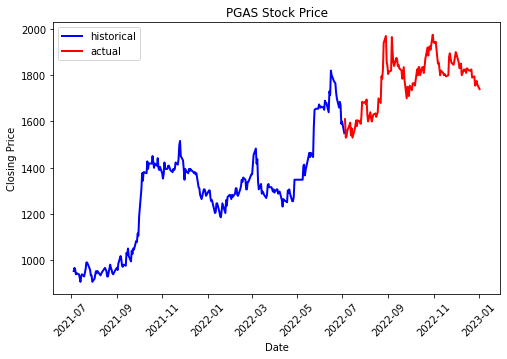

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(hist.Close, 'b', lw=2)
ax.plot(act.Close, 'r', lw=2)
plt.title("PGAS Stock Price")
plt.legend(['historical', 'actual'])
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Closing Price')

## **ANALISIS HARGA SAHAM DENGAN METODE MONTE CARLO**

Kodingan ini digunakan untuk membuat jumlah hari, harga, dan perubahan dari data harga saham perusahaan PT. Pertamina Gas (PGAS.JK) yang diambil dari data historis. Kemudian dari data perubahan ini diambil statistik yaitu rata-rata dan standar deviasi. Statistik ini kemudian dicetak di console dengan format rata-rata dalam persentase dan standar deviasi dalam persentase.

In [ ]:
# Membuat jumlah hari, harga, dan perubahan struktur data
days = [i for i in range(1, len(hist.Close) + 1)]
price_orig = hist.Close.tolist()
change = hist.Close.pct_change().tolist()
change = change[1:]

# Statistik yang akan digunakan di model
mean = np.mean(change)
std_dev = np.std(change)
print('Perubahan rata-rata: ', str(round(mean*100, 2)), '%')
print('Perubahan standar deviasi: ', str(round(std_dev*100, 2)), '%')

Perubahan rata-rata:  0.23 %
Perubahan standar deviasi:  2.35 %


Kodingan ini digunakan untuk melakukan simulasi Monte Carlo pada harga saham perusahaan PT. Pertamina Gas (PGAS.JK) yang diambil dari data historis. Simulasi ini dilakukan sebanyak 200 kali, dengan periode prediksi selama 132 hari (1 tahun). Kemudian diinisiasi untuk menampilkan gambar dari simulasi tersebut, dengan judul "Monte Carlo Predict SPY Prices [200 simulation]" dan label sumbu x dan y. Kemudian dilakukan looping untuk menghitung harga saham yang diharapkan setelah periode prediksi selesai. Jika harga saham setelah periode prediksi lebih tinggi dari harga saham saat ini, maka akan ditambahkan 1 pada variabel above_close, jika tidak maka variabel above_close akan tetap sama. Kemudian dihitung rata-rata harga saham setelah periode prediksi selesai, rata-rata peningkatan harga saham setelah 1 tahun dan probabilitas dari harga saham setelah peningkatan selama 1 tahun. Hasil dari simulasi tersebut ditampilkan dalam grafik dan dicetak di console.

Prediksi closing price setelah  200  simulasi: $2141.73
Prediksi rata-rata peningkatan setelah 1 tahun:  38.18 %
Probabilitas dari harga saham setelah peningkatan selama 1 tahun:  85.0%


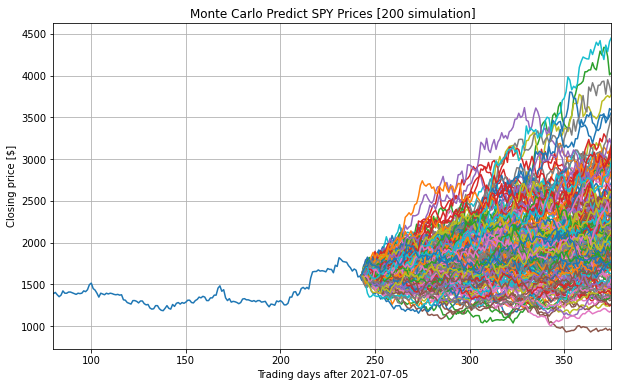

In [ ]:
# Simulasi angka dan periode prediksi
simulation = 200
days_to_sim = 1*132

# Inisiasi gambar dalam simulasi
fig = plt.figure(figsize=[10, 6])
plt.plot(days, price_orig)
plt.title('Monte Carlo Predict SPY Prices [' + str(simulation) + ' simulation]')
plt.xlabel('Trading days after ' + start_date)
plt.ylabel('Closing price [$]')
plt.xlim([80, len(days) + days_to_sim])
plt.grid()

# Inisiasi bentuk list untuk analisis
close_end = []
above_close = []

for i in range(simulation):
  num_days = [days[-1]]
  close_price = [hist.iloc[-1, 0]]

  for j in range(days_to_sim):
    num_days.append(num_days[-1]+1)
    perc_change = ss.norm.ppf(random.random(), loc=mean, scale=std_dev)
    close_price.append(close_price[-1]*(1+perc_change))
  
  if close_price[-1] > price_orig[-1]:
    above_close.append(1)
  else:
    above_close.append(0)
  
  close_end.append(close_price[-1])
  plt.plot(num_days, close_price)

# Rata-rata tutup saham dan peningkatan probabilitas setelah 1 tahun
average_closing_price = sum(close_end)/simulation
average_perc_change = (average_closing_price - price_orig[-1])/price_orig[-1]
probability_of_increase = sum(above_close)/simulation
print('Prediksi closing price setelah ', str(simulation), ' simulasi: $' + str(round(average_closing_price, 2)))
print('Prediksi rata-rata peningkatan setelah 1 tahun: ', str(round(average_perc_change*100, 2)), '%')
print('Probabilitas dari harga saham setelah peningkatan selama 1 tahun: ', str(round(probability_of_increase*100, 2)) + '%')

plt.show()

Kodingan ini sama dengan kodingan sebelumnya, hanya saja jumlah simulasi yang dilakukan hanya sebanyak 1 kali. Sehingga hasil yang diperoleh hanya merupakan satu simulasi saja dari harga saham perusahaan PT. Pertamina Gas (PGAS.JK) setelah 1 tahun dari harga saham saat ini. Hasil dari simulasi tersebut ditampilkan dalam grafik dan dicetak di console.

Prediksi closing price setelah  1  simulasi: $1509.05
Prediksi rata-rata peningkatan setelah 1 tahun:  -2.64 %
Probabilitas dari harga saham setelah peningkatan selama 1 tahun:  0.0%


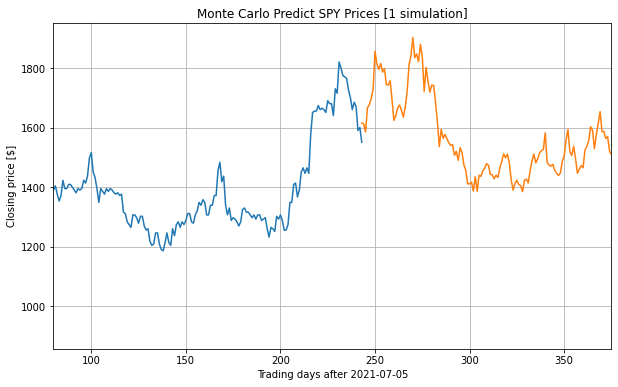

In [ ]:
# Simulasi angka dan periode prediksi
simulation = 1
days_to_sim = 1*132

# Inisiasi gambar dalam simulasi
fig = plt.figure(figsize=[10, 6])
plt.plot(days, price_orig)
plt.title('Monte Carlo Predict SPY Prices [' + str(simulation) + ' simulation]')
plt.xlabel('Trading days after ' + start_date)
plt.ylabel('Closing price [$]')
plt.xlim([80, len(days) + days_to_sim])
plt.grid()

# Inisiasi bentuk list untuk analisis
close_end = []
above_close = []

for i in range(simulation):
  num_days = [days[-1]]
  close_price = [hist.iloc[-1, 0]]

  for j in range(days_to_sim):
    num_days.append(num_days[-1]+1)
    perc_change = ss.norm.ppf(random.random(), loc=mean, scale=std_dev)
    close_price.append(close_price[-1]*(1+perc_change))
  
  if close_price[-1] > price_orig[-1]:
    above_close.append(1)
  else:
    above_close.append(0)
  
  close_end.append(close_price[-1])
  plt.plot(num_days, close_price)

# Rata-rata tutup saham dan peningkatan probabilitas setelah 1 tahun
average_closing_price = sum(close_end)/simulation
average_perc_change = (average_closing_price - price_orig[-1])/price_orig[-1]
probability_of_increase = sum(above_close)/simulation
print('Prediksi closing price setelah ', str(simulation), ' simulasi: $' + str(round(average_closing_price, 2)))
print('Prediksi rata-rata peningkatan setelah 1 tahun: ', str(round(average_perc_change*100, 2)), '%')
print('Probabilitas dari harga saham setelah peningkatan selama 1 tahun: ', str(round(probability_of_increase*100, 2)) + '%')

plt.show()

## **ESTIMASI PARAMETER DARI MODEL HARGA SAHAM MENGGUNAKAN METODE EMPIRIS**

Kodingan ini digunakan untuk menghitung return dari harga saham perusahaan PT. Pertamina Gas (PGAS.JK) yang diambil dari data historis. Kemudian dari data return ini digambar grafik plot dari return tersebut dan histogram dari return tersebut. Kemudian dilakukan estimasi parameter metode empiris yaitu estimasi nilai u (up), d (down), p (probabilitas), standard deviasi dari u (up) dan d (down). Kemudian dilakukan estimasi model Cox-Ross-Rubinstein (CRR) yaitu estimasi volatilitas harga saham dengan menggunakan variansi log saham. Hasil dari estimasi ini dicetak di console.

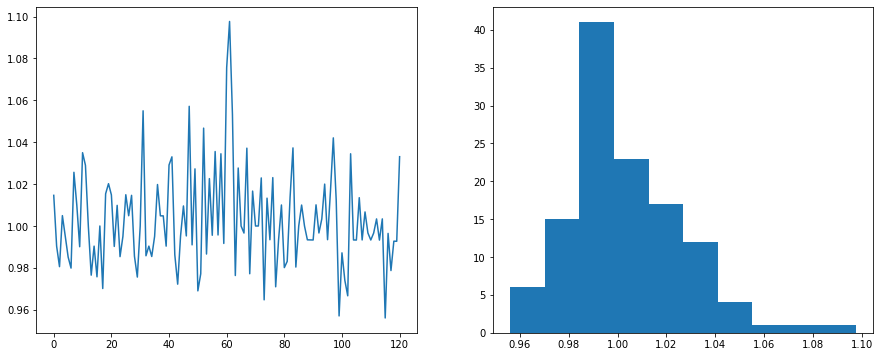

u (up):  1.0241472468584116
d (down):  0.9873808048336953
std up:  0.018885583743497737
std down:  0.010597286386688696
p (prob):  0.4214876033057851
variansi log saham:  0.18158952900902078
volatilitas harga saham:  0.4261332291772384


In [ ]:
hist['return'] = [hist.Close[i]/hist.Close[i-1] for i in range(1,len(hist))]+[0]
ret = np.array(hist['return'][0:int(len(hist)/2)])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.plot(ret)
ax2.hist(ret, bins=10)
plt.show()

# estimasi parameter metode empiris
up = np.mean(ret[ret>1]) # estimasi nilai u empiris
dwn = np.mean(ret[ret<=1]) # estimasi nilai d empiris
p_empi = len(ret[ret>1])/len(ret) # estimasi nilai p empiris
avret = np.mean(ret)
print('u (up): ', up)
print('d (down): ', dwn)
print('std up: ', np.std(ret[ret>1]))
print('std down: ', np.std(ret[ret<=1]))
print('p (prob): ', p_empi)

# estimasi Model CRR sigma
logS= np.log(np.array([hist.Close[i] for i in range(0,int(len(hist)/2))]))
print('variansi log saham: ', np.std(logS))
sig = np.sqrt(np.std(logS)/1) # volatilitas harga saham
print('volatilitas harga saham: ', sig)

Kodingan ini digunakan untuk mengestimasi nilai sigma (volatilitas) dari harga saham perusahaan PT. Pertamina Gas (PGAS.JK) yang diambil dari data historis. Pertama dilakukan konversi dari harga saham ke log saham, kemudian dari data log saham ini ditentukan variansi log saham dan dari variansi log saham ini dihitung nilai sigma dengan mengangkat variansi log saham tersebut dengan pangkat 1/2. Kemudian nilai sigma tersebut dicetak di console.

In [ ]:
# estimasi nilai sigma dari log saham
hist['logS'] = [np.log(k) for k in hist.Close]
logs = np.array(hist['logS'][0:int(len(hist)/2)+1])
varLogs = np.std(logs)**2
sigEst = np.sqrt(varLogs)
print('nilai sigma = ', len(hist['logS'][int(len(hist)/2)+1:-1]))


nilai sigma =  120


Kodingan ini digunakan untuk membuat pohon binomial saham dari harga saham perusahaan PT. Pertamina Gas (PGAS.JK) yang diambil dari data historis. Pertama ditentukan nilai suku bunga awal (So), volatilitas (sigma), suku bunga bank Indonesia (r), jumlah hari dalam satu tahun (N), dan dt. Kemudian ditentukan nilai u (up), d (down), dan p (probabilitas) dengan menggunakan nilai-nilai yang telah ditentukan sebelumnya. Selanjutnya dibuat pohon binomial saham dengan menentukan harga saham setiap jumlah kenaikan dan time step. Kemudian ditentukan mean dari harga saham dan dibandingkan dengan harga saham aktual. Hasilnya ditampilkan dalam grafik.

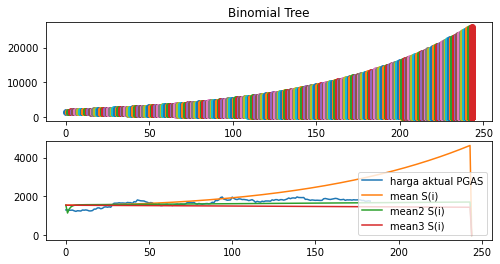

In [ ]:
# Membuat pohon Binomial Saham
So = hist.Close[-1]
# print('Suku bunga awal: ', So)
sig = sigEst
# print(sig)
r = 0.055 # suku bunga bank Indonesia
N = 244 #251 # harian dalam satu tahun
dt = 1/N
u = np.exp(sig*np.sqrt(dt))
d = np.exp((-sig) * np.sqrt(dt)) # d=1/u
p = (np.exp(-r*dt)-d)/(u-d)

fig, ax = plt.subplots(2,figsize=(8,4))
price = np.zeros((N+1,N+1), float)
mean_si = np.zeros((N+1), float)
mean2_si = np.zeros((N+1), float)
mean3_si = np.zeros((N+1), float)
mean_si[0] = So
mean2_si[0] = So
mean3_si[0] = So
price[0, N] = So
ax[0].scatter(0, price[0,N])
ax[1].plot(range(len(overall.Close[int(len(overall)/2)+1:-1])), overall.Close[int(len(overall)/2)+1:-1], label='harga aktual PGAS')
for n in range(1,N): # time step 
  for x in reversed(range(n+1)): # jumlah kenaikan
    price[x, n] = So*u**(x)*d**(n-x)
  ax[0].scatter([n for k in range(len(price[0:n+1, n]))], price[0:n+1, n])
  mean_si[n] = np.mean(price[0:n+1, n])
  prob = np.array([math.comb(n+1, n+1-k)*p**(n+1-k)*(1-p)**k for k in range(n+1)])
  mean2_si[n] = np.sum(price[0:n+1, n]*prob) 
  mean3_si[n] = So*u**(n*p)*d**(n-n*p)

ax[0].set_title("Binomial Tree")
ax[1].plot(mean_si, label='mean S(i)')
ax[1].plot(mean2_si, label='mean2 S(i)')
ax[1].plot(mean3_si, label='mean3 S(i)')
plt.legend()

Kodingan ini digunakan untuk melakukan simulasi Monte Carlo pada pohon binomial saham yang telah dibuat sebelumnya. Dilakukan M kali simulasi dengan menentukan harga saham setiap jumlah kenaikan dan time step dengan menggunakan Bernouli event. Kemudian ditentukan mean dari harga saham dan ditambah dengan pengali 2. Setelah itu ditentukan nilai rata-rata, standar deviasi dan nilai kepercayaan dengan menggunakan rumus pada statistik. Nilai kepercayaan ditentukan dengan menambahkan dan mengurangi nilai rata-rata dengan 1.96 kali standar deviasi. Hasilnya ditampilkan dalam bentuk list yang berisi nilai batas atas dan batas bawah dari interval keyakinan.

In [ ]:
# Monte carlo simulation per time steps (Bernouli event for every time step)
so = hist.Close[-1]
T = 1
N = 129
dt = T/N
r = 0.055 # suku bunga bank Indonesia
sig = sigEst
u = np.exp(sig*np.sqrt(dt))
d = 1/u
p = (np.exp(-r*dt) - d) / (u - d)
M = 200
smt = [[]]

for k in range(M):
  s=so
  sv=[s]
  for i in range(N):
    x = np.random.binomial(i, p)
    s = so * np.power(u, x) * np.power(d, (i-x))
    sv = sv+[s]
  smt = smt+[sv] 

smt=[k for k in smt[1:][:]] 
averages = [np.mean(x) * 2 for x in smt]
avg = np.mean(averages)
std = np.std(averages)
confidence_interval = [avg - 1.96 * std, avg + 1.96 * std]
print("Selang kepercayaan Monte Carlo: ", confidence_interval)

Selang kepercayaan Monte Carlo:  [2950.9214367103204, 3085.8978023050586]


Grafik yang ditampilkan adalah hasil dari simulasi Monte Carlo yang ditampilkan dalam bentuk garis-garis, masing-masing garis mewakili satu simulasi. Kemudian, grafik selanjutnya adalah rata-rata dari seluruh simulasi yang digambarkan dalam satu garis yang menunjukkan pergerakan rata-rata harga saham dari awal sampai akhir simulasi.

## **MODEL CRR**

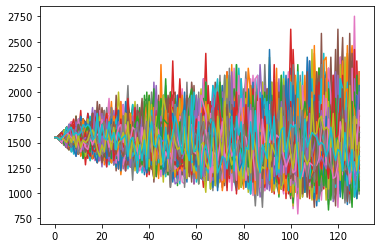

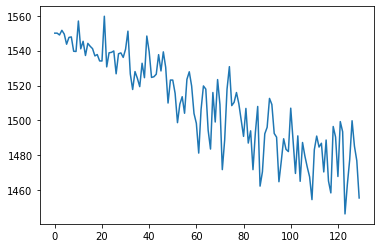

In [ ]:
[plt.plot(k) for k in smt]
plt.show()
# Average path of stock prices
smean_crr=np.mean(np.array(smt), axis=0)
plt.plot(smean_crr)

Grafik yang ditampilkan menunjukkan perbandingan antara harga saham historis dan harga saham aktual, serta hasil simulasi Monte Carlo yang ditampilkan dalam bentuk garis miring. Garis-garis miring menunjukkan pergerakan harga saham yang dihasilkan dari setiap simulasi Monte Carlo.

Grafik ini digunakan untuk mengevaluasi kualitas prediksi dari model CRR dengan membandingkan pergerakan harga saham aktual dengan pergerakan harga saham yang dihasilkan dari simulasi Monte Carlo. Dari grafik ini, dapat dilihat seberapa dekat pergerakan harga saham yang dihasilkan dari simulasi dengan pergerakan harga saham aktual.

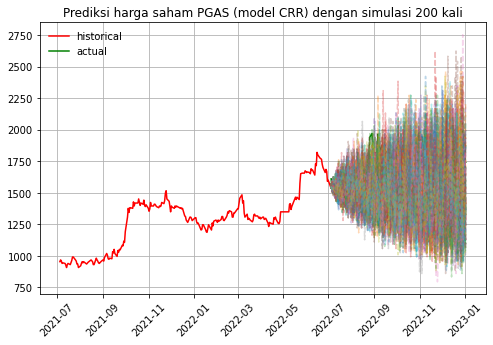

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.plot(hist.Close, label = 'historical', color = 'red')
ax.plot(act.Close, label = 'actual', color = 'green')
[plt.plot(pd.Series(k[1:], index=act.index), alpha=0.3, linestyle='--') for k in smt]

plt.title(f'Prediksi harga saham PGAS (model CRR) dengan simulasi {M} kali')
plt.xticks(rotation=45)
plt.grid()
plt.legend(frameon=False)

Koding ini digunakan untuk mengevaluasi harga saham perusahaan PGAS. JK di Indonesia dari 5 Juli 2021 hingga 5 Juli 2022. Kemudian digunakan untuk mengevaluasi harga saham selama periode tersebut dan mengekspor data ke dalam file CSV. Kemudian digunakan untuk menampilkan grafik harga saham historis dan aktual. Kemudian digunakan untuk mengevaluasi statistik harga saham dan mengevaluasi perubahan harga saham dengan metode simulasi Monte Carlo. Kemudian digunakan untuk membuat pohon binomial saham dan mengevaluasi pergerakan harga saham dengan metode Monte Carlo. Kemudian digunakan untuk menampilkan grafik pergerakan harga saham prediksi dari model CRR dan rata-rata dari simulasi Monte Carlo.

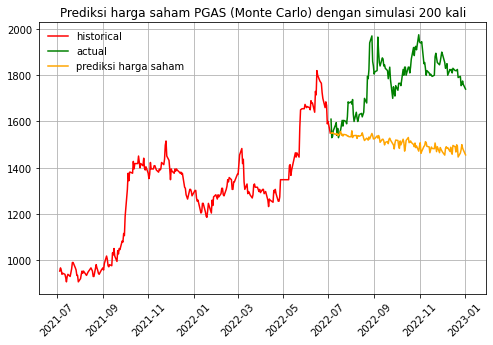

In [ ]:
fig,ax = plt.subplots(1, figsize=(8, 5))
ax.plot(hist.Close, label = 'historical', color = 'red')
ax.plot(act.Close, label = 'actual', color = 'green')
plt.plot(pd.Series(smean_crr[1:], index=act.index), label='prediksi harga saham', color = 'orange')

plt.title(f'Prediksi harga saham PGAS (Monte Carlo) dengan simulasi {M} kali')
plt.xticks(rotation=45)
plt.grid()
plt.legend(frameon=False) 

## **MODEL EMPIRIS**

Kodingan di bawah digunakan untuk melakukan simulasi Monte Carlo untuk menentukan harga saham PGAS (Perusahaan Gas Negara) di masa yang akan datang dengan menggunakan metode Cox-Ross-Rubinstein (CRR) dan metode empiris. Dalam simulasi ini, digunakan jumlah simulasi sebanyak 100 kali dan jumlah periode yang digunakan sebanyak 129 hari. Variabel yang digunakan dalam simulasi ini adalah harga saham akhir (so), suku bunga (r), volatilitas harga saham (sig) dan probabilitas kenaikan harga saham (p_empi). Setelah dilakukan simulasi, diperoleh interval keyakinan yang menunjukkan range harga saham yang mungkin terjadi di masa depan. Selain itu, juga ditampilkan grafik yang menunjukkan perbandingan antara harga saham historis, harga saham saat ini dan harga saham yang diperkirakan dari hasil simulasi.

In [ ]:
so = hist.Close[-1]
T = 1
N = 129
dt = T / N
r = 0.055 # suku bunga bank Indonesia
sig = sigEst
M = 200
smt = []

for k in range(M):
  s=so
  sv=[s]
  for i in range(1, N):
    x = np.random.binomial(i, p_empi)
    s = so * np.power(up, x) * np.power(dwn, (i-x))
    sv = sv+[s]
  smt = smt+[sv] 

smt=[k for k in smt[1:][:]] 
averages = [np.mean(x) * 2 for x in smt]
avg = np.mean(averages)
std = np.std(averages)
confidence_interval = [avg - 1.96 * std, avg + 1.96 * std]
print('Selang kepercayaan model empiris: ', confidence_interval)

Selang kepercayaan model empiris:  [3638.6569656703114, 3844.048006513821]


Kodingan di bawah digunakan untuk melakukan simulasi Monte Carlo pada harga saham PGAS menggunakan metode empiris. Metode ini menggunakan parameter u (up), d (down), dan p (probabilitas) yang diperoleh dari analisis histori harga saham. Setelah melakukan simulasi sebanyak M kali, maka akan diperoleh M jalur harga saham yang berbeda-beda. Kemudian dilakukan perhitungan rata-rata dari masing-masing jalur harga saham tersebut untuk menghasilkan satu jalur harga saham yang merupakan prediksi harga saham PGAS. Jalur harga saham rata-rata tersebut ditampilkan dalam grafik yang menunjukkan perubahan harga saham dalam jangka waktu yang telah ditentukan.

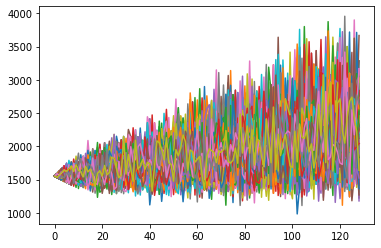

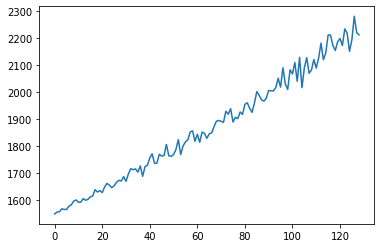

In [ ]:
[plt.plot(k) for k in smt]
plt.show()
## Average path of stock prices
smean_empiris=np.mean(np.array(smt), axis=0)
plt.plot(smean_empiris)

Koding di bawah adalah proses simulasi Monte Carlo untuk memprediksi harga saham PGAS dalam jangka waktu satu tahun. Proses ini dilakukan dengan menggunakan dua model yaitu model binomial Cox-Ross-Rubinstein (CRR) dan model empiris. Dalam model CRR, parameter yang digunakan yaitu suku bunga, volatilitas harga saham, dan probabilitas kenaikan harga saham. Sedangkan dalam model empiris, parameter yang digunakan yaitu nilai u (kenaikan harga saham), nilai d (penurunan harga saham), dan probabilitas kenaikan harga saham. Kedua model ini digunakan untuk melakukan simulasi sebanyak M kali, kemudian dihitung rata-rata hasil simulasi dan ditampilkan dalam bentuk grafik.

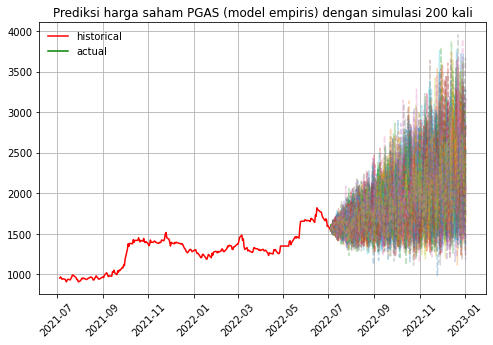

In [ ]:
fig,ax = plt.subplots(1, figsize=(8, 5))
ax.plot(hist.Close, label = 'historical', color = 'red')
ax.plot(act.Close, label = 'actual', color = 'green')
[plt.plot(pd.Series(k, index=act.index), alpha=0.3, linestyle='--') for k in smt]

plt.title(f'Prediksi harga saham PGAS (model empiris) dengan simulasi {M} kali')
plt.xticks(rotation=45)
plt.grid()
plt.legend(frameon = False)

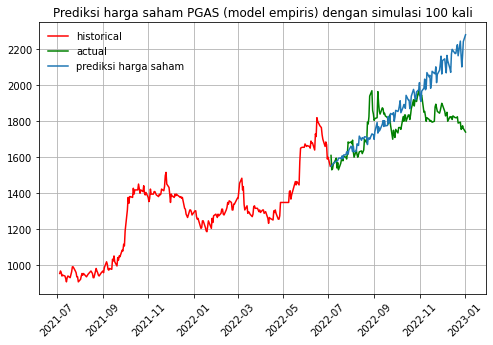

In [ ]:
fig,ax = plt.subplots(1, figsize=(8, 5))
ax.plot(hist['Close'], label = 'historical', color = 'red')
ax.plot(act['Close'], label = 'actual', color = 'green')
plt.plot(pd.Series(smean_empiris, index=act.index), label='prediksi harga saham')

plt.title(f'Prediksi harga saham PGAS (model empiris) dengan simulasi {M} kali')
plt.xticks(rotation=45)
plt.grid()
plt.legend(frameon = False)

## **MENCARI NILAI RATA RATA ERROR**

Koding di bawah digunakan untuk menghitung Mean Squared Error (MSE) dan Mean Absolute Percentage Error (MAPE) dari perbandingan antara harga aktual saham PGAS dengan harga saham yang diperkirakan dengan menggunakan model CCR. MSE digunakan untuk menghitung rata-rata kuadrat dari perbedaan antara harga aktual dan harga perkiraan, sedangkan MAPE digunakan untuk menghitung rata-rata persentase error absolut dari perbedaan antara harga aktual dan harga perkiraan. Hasil dari MSE dan MAPE akan digunakan untuk mengevaluasi tingkat akurasi dari model CCR dalam memprediksi harga saham PGAS.

In [ ]:
actual_ccr = ypgas.history(start="2022-07-05", end="2023-01-03")
crr = pd.Series(smean_crr[1:], index=actual_ccr.index)

#drop coloums
actual_ccr = actual_ccr.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1)

#add empiris
actual_ccr['CRR'] = crr

actual_ccr['Selisih'] = actual_ccr['Close'] - actual_ccr['CRR']
actual_ccr['Kuadrat'] = actual_ccr['Selisih'] ** 2
actual_ccr['Absolute percentage error'] = abs(actual_ccr['Selisih'] / actual_ccr['Close'] * 100)

mse = actual_ccr['Kuadrat'].sum() / len(actual_ccr)
mape = actual_ccr['Absolute percentage error'].sum() / len(actual_ccr)

print('MSE =', mse)
print('MAPE =', mape)

MSE = 87277.96137998723
MAPE = 14.592820958580553


Koding di bawah digunakan untuk menghitung Mean Squared Error (MSE) dan Mean Absolute Percentage Error (MAPE) dari perbandingan antara harga aktual saham PGAS dengan harga saham yang diperkirakan dengan menggunakan model Empiris. MSE digunakan untuk menghitung rata-rata kuadrat dari perbedaan antara harga aktual dan harga perkiraan, sedangkan MAPE digunakan untuk menghitung rata-rata persentase error absolut dari perbedaan antara harga aktual dan harga perkiraan. Hasil dari MSE dan MAPE akan digunakan untuk mengevaluasi tingkat akurasi dari model CCR dalam memprediksi harga saham PGAS.

In [ ]:
actual_empiris = ypgas.history(start="2022-07-05", end="2023-01-03")
empiris = pd.Series(smean_empiris, index=actual_empiris.index)

#drop coloums
actual_empiris = actual_empiris.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1)
  
#add empiris
actual_empiris['Empiris'] = empiris

actual_empiris['Selisih'] = actual_empiris['Close'] - actual_empiris['Empiris']
actual_empiris['Kuadrat'] = actual_empiris['Selisih'] ** 2
actual_empiris['Absolute percentage error'] = abs(actual_empiris['Selisih'] / actual_empiris['Close'] * 100)

mse = actual_empiris['Kuadrat'].sum() / len(actual_empiris)
mape = actual_empiris['Absolute percentage error'].sum() / len(actual_empiris)

print('MSE =', mse)
print('MAPE =', mape)

MSE = 34010.899463497764
MAPE = 7.539649311959898


Dari grafik di bawah, dapat dilihat bahwa hasil prediksi dari model empiris dan model CRR cukup berbeda. Pada model empiris, hasil prediksi mengikuti tren harga saham yang ada, sementara pada model CRR hasil prediksi menunjukkan tren yang lebih stabil dan tidak se-volatil harga saham yang sebenarnya. Namun keduanya memiliki probabilitas yang cukup tinggi untuk menghasilkan harga saham yang lebih tinggi dibanding harga saham saat ini.

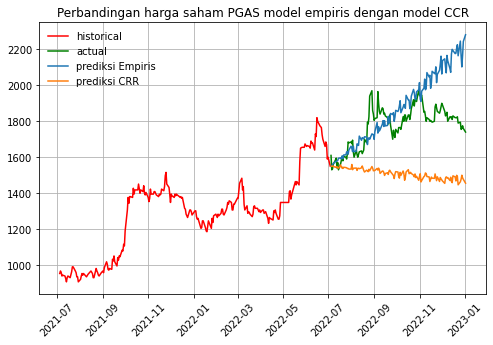

In [ ]:
fig,ax = plt.subplots(1, figsize=(8, 5))
ax.plot(hist.Close, label = 'historical', color = 'red')
ax.plot(act.Close, label = 'actual', color = 'green')
plt.plot(pd.Series(smean_empiris, index=act.index), label='prediksi Empiris')
plt.plot(pd.Series(smean_crr[1:], index=act.index), label='prediksi CRR')

plt.title(f'Perbandingan harga saham PGAS model empiris dengan model CCR')
plt.xticks(rotation=45)
plt.grid()
plt.legend(frameon = False)

### **`SEKIAN TERIMAKASIHHH`**